<a href="https://colab.research.google.com/github/mousitaD/MLOps/blob/main/ANNExp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
# Step 2: Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# Step 3: Build the ANN Model
model = Sequential([
    Flatten(input_shape=(28, 28)),           # Flatten the 28x28 images to 784 features
    Dense(128, activation='relu'),           # Hidden layer with 128 neurons
    #Dense(64, activation='relu'),            # Another hidden layer with 64 neurons
    Dense(10, activation='softmax')          # Output layer with 10 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 4: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 5: Train the Model
history = model.fit(x_train, y_train_cat,
                    validation_data=(x_test, y_test_cat),
                    epochs=5,
                    batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8772 - loss: 0.4335 - val_accuracy: 0.9575 - val_loss: 0.1431
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9616 - loss: 0.1261 - val_accuracy: 0.9703 - val_loss: 0.0994
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9756 - loss: 0.0803 - val_accuracy: 0.9752 - val_loss: 0.0791
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9827 - loss: 0.0573 - val_accuracy: 0.9767 - val_loss: 0.0734
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9869 - loss: 0.0433 - val_accuracy: 0.9773 - val_loss: 0.0728


In [ ]:
# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.0862
Test Accuracy: 0.9773


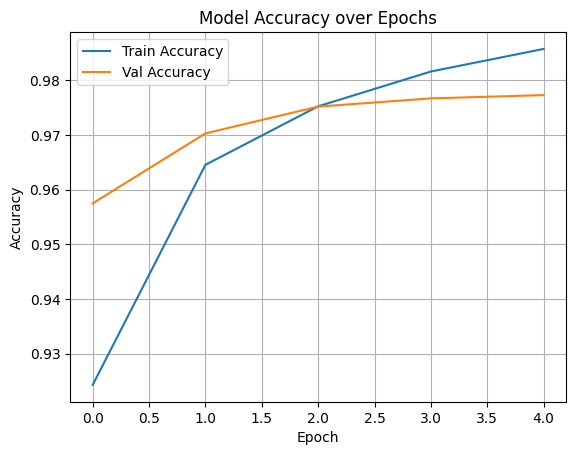

In [ ]:
# Step 7: Visualize Training History
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


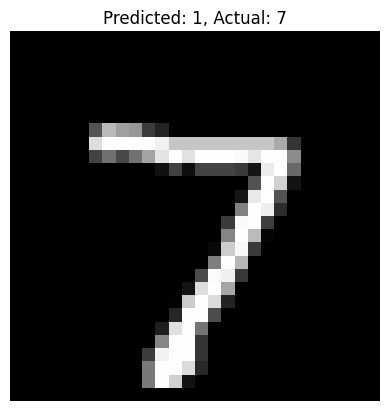

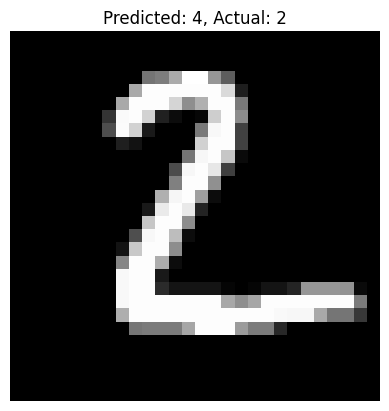

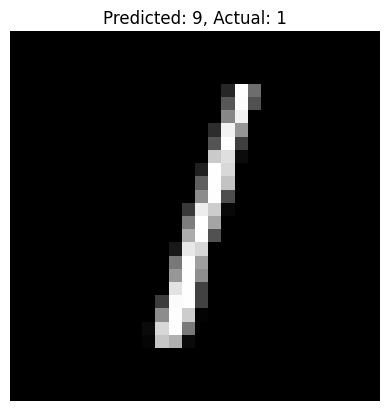

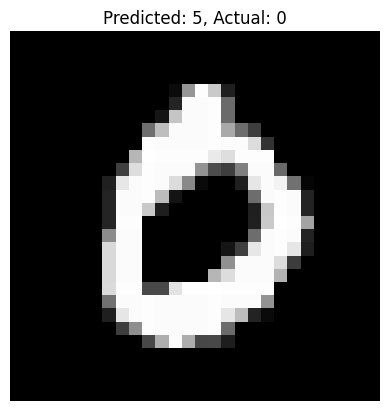

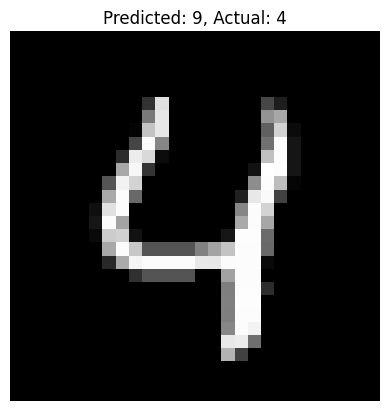

In [ ]:
# Step 8: Predict and Display Results
import numpy as np

# Predict first 5 test images
predictions = model.predict(x_test[5:10])

# Display images and predictions
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()